
# Graph Spectra
- clustering graphs

[On Spectral Clustering: analysis and an algorithm](https://ai.stanford.edu/~ang/papers/nips01-spectral.pdf)



In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


def spectral_clustering(points, k, sigma):
    """
    Perform spectral clustering on a given set of points.

    Parameters:
    - points: ndarray of shape (n_samples, n_features), the input data points.
    - k: int, the number of clusters.
    - sigma: float, parameter for the Gaussian similarity function.

    Returns:
    - cluster_labels: ndarray of shape (n_samples,), the cluster labels for each point.
    """

    # Step 1: Form the affinity matrix
    distances = euclidean_distances(points, points)
    affinity_matrix = np.exp(-distances**2 / (2 * sigma**2))
    np.fill_diagonal(affinity_matrix, 0)

    # Step 2: Construct the normalized graph Laplacian
    degree_matrix = np.diag(affinity_matrix.sum(axis=1))
    D_inv_sqrt = np.diag(1 / np.sqrt(affinity_matrix.sum(axis=1)))
    laplacian = D_inv_sqrt @ affinity_matrix @ D_inv_sqrt

    # Step 3: Compute the k largest eigenvectors
    eigvals, eigvecs = np.linalg.eigh(laplacian)
    indices = np.argsort(eigvals)[-k:]  # Take the k largest eigenvectors
    X = eigvecs[:, indices]

    # Step 4: Normalize the rows of X
    Y = X / np.linalg.norm(X, axis=1, keepdims=True)

    # Step 5: Cluster the rows of Y using k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Y)
    cluster_labels = kmeans.labels_

    return cluster_labels


In [11]:
import numpy as np

def read_data(filepath):
    data = np.genfromtxt(filepath, delimiter=',')
    return data



In [20]:
points = read_data('data/example1.dat')

In [21]:
labels = spectral_clustering(points, 4, 1.0)

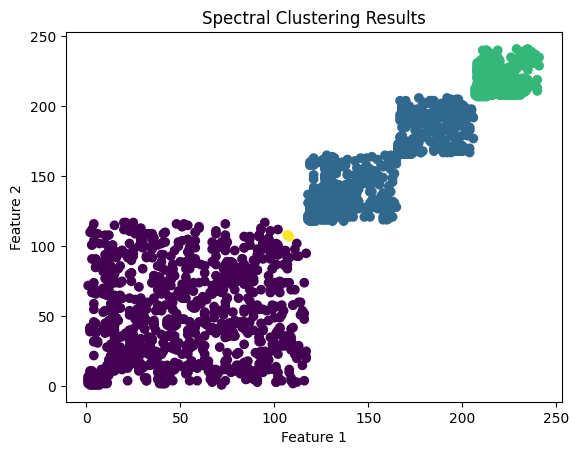

In [22]:
import matplotlib.pyplot as plt

plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.title("Spectral Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()